In [1]:
import backtesting_framework as bf
import momentum_strategy
import pandas as pd
import datetime

### 讀取資料

In [2]:
datas_table = pd.read_csv('(2010-2021)stock_price.csv', index_col=0, header=[0,1], parse_dates=True)
datas_table.head(2)

AAPL US Equity                                              \
                    CLOSE      HIGH       LOW      OPEN        VOLUME   
2010-01-04       7.649278  7.660707  7.586421  7.626778  1.525399e+08   
2010-01-05       7.656421  7.699635  7.616421  7.671064  1.704628e+08   

           NFLX US Equity                                              ...  \
                    CLOSE      HIGH       LOW      OPEN        VOLUME  ...   
2010-01-04       7.639992  7.944278  7.565707  7.887135  6.048363e+06  ...   
2010-01-05       7.358564  7.652849  7.258564  7.652849  6.669432e+06  ...   

           GE US Equity                                                 \
                  CLOSE        HIGH         LOW        OPEN     VOLUME   
2010-01-04   118.810624  120.271725  116.503621  116.965022  1736937.5   
2010-01-05   119.425824  120.425525  118.810624  118.810624  1476875.0   

           OXY US Equity                                              
                   CLOSE       HIGH        LOW       OPEN     VOLUME  
2010-01-04     79.711135  80.085231  78.847838  79.202749  1035600.0  
2010-01-05     79.135604  79.835834  78.684771  79.711135  1034400.0  

[2 rows x 25 columns]

### 回測

In [3]:
# 參數設定
formation_period=20  # 用20個交易日計算動能
stocks_number=2      # 每次rebalance買進兩支股票
reserve_ratio=0.05   # 每次rebalance保留5%現金
strategy_execute_start_date = datetime.datetime(2019,12,31) # 策略執行日


#回測

# 初始化回測物件
cerebro = bf.cerebro.Cerebro()
# 傳入回測資料
cerebro.datas_table = datas_table
# 加入策略類別，並且設定策略內生變數
cerebro.addstrategy(
    momentum_strategy.Strategy,
    formation_period=formation_period,
    stocks_number=stocks_number,
    reserve_ratio=reserve_ratio
)
# 設定是否輸出提示訊息
cerebro.notify_orNot = False
# 是否在策略最後一天賣掉所有股票
cerebro.close_at_BacktestingEndDate_orNot = True
# 初始資金
cerebro.cash = 100000

# 回測所有資料起始日(計算)
cerebro.start_date = datetime.datetime(2019,12,1)
# 執行策略時間點
cerebro.strategy_execute_start_date = strategy_execute_start_date
# 資料結束日、回測結束日
cerebro.end_date = datetime.datetime(2021,12,31)

# 執行
cerebro.run()

### 策略價值走勢圖(剩餘現今走勢圖)

<AxesSubplot:>

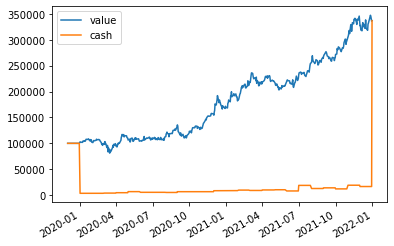

In [4]:
cerebro.analysis_obj.account_timeseries_state.plot()

### 輸出策略基礎敘述統計量

In [5]:
print('策略年化報酬 = ',cerebro.analysis_obj.calculate_annualized_return())
print('策略年化波動度 = ',cerebro.analysis_obj.calculate_annualized_volatility())
print('策略年化夏普比例 = ',cerebro.analysis_obj.calculate_annualized_sharpe_ratio())

策略年化報酬 =  0.6537422086746815
策略年化波動度 =  0.37747559190955016
策略年化夏普比例 =  1.7318794186600803


### 策略滾動六個月年畫報酬

<AxesSubplot:>

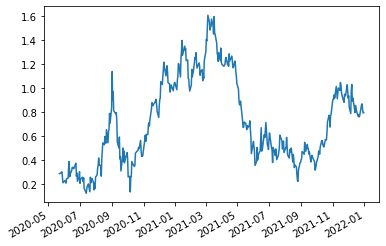

In [6]:
period = 20*6
cerebro.analysis_obj.calculate_rolling_annualized_return(period).plot()

### 策略滾動六個月年畫波動度

<AxesSubplot:>

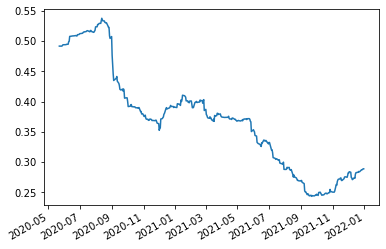

In [7]:
period = 20*6
cerebro.analysis_obj.calculate_rolling_annualized_volatility(period).plot()

### 策略滾動六個月年畫夏普比例

<AxesSubplot:>

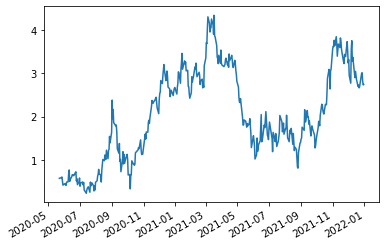

In [8]:
period = 20*6
cerebro.analysis_obj.calculate_rolling_annualized_sharpe_ratio(period).plot()

### 所有曾買進的股票對於策略的貢獻

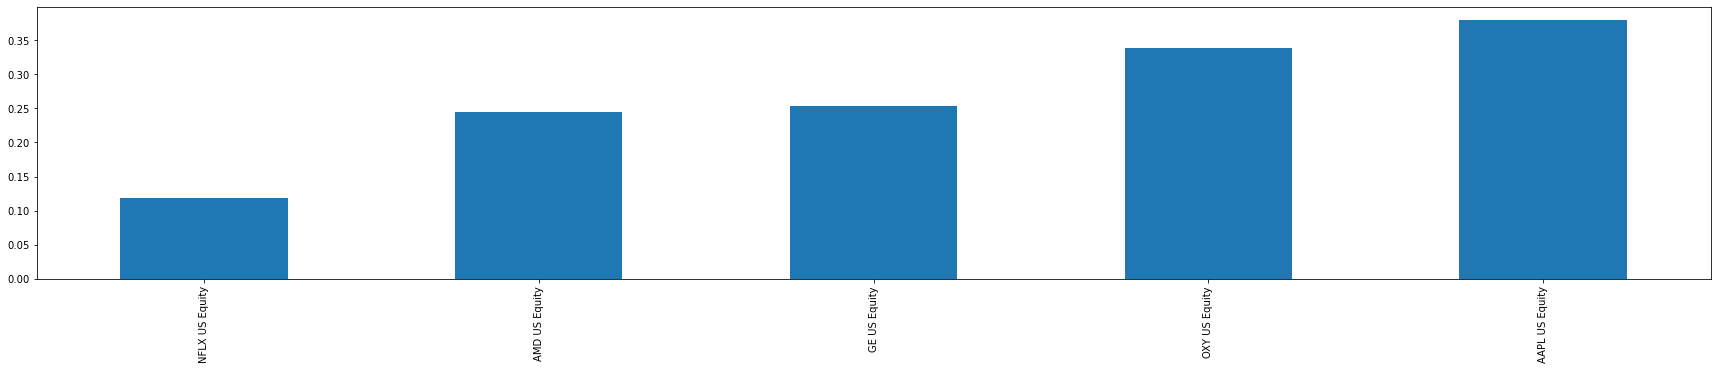

In [9]:
cerebro.analysis_obj.plot_the_contribution_of_individual_tickers()

### 個股過去持有狀況

<AxesSubplot:>

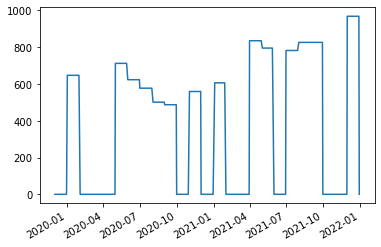

In [17]:
# 持有股數
cerebro.data_center.HoldingTicker_size.loc[:,'AAPL US Equity'].plot()

<AxesSubplot:>

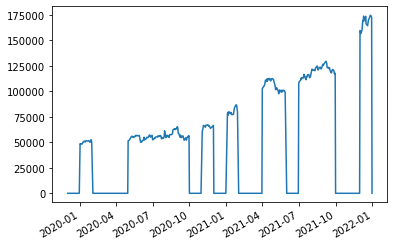

In [18]:
# 持有市場價值
cerebro.data_center.HoldingTicker_MarketValue.loc[:,'AAPL US Equity'].plot()